<a href="https://colab.research.google.com/github/Aryan3152/Fedex-EDA/blob/main/Fedex_project_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# project name - FEDEX LOGISTIC EXPLORATORY DATA ANALYSIS

project type - exploratory data analysis

contribution - individual

#GITHUB LINK

#Project Summary

This project delves into FedEx's historical shipment data to uncover critical insights regarding on-time delivery performance and insurance costs. The primary goal is to identify key factors (such as Team, Mode, Country, and INCO Terms) that significantly influence these metrics. By analyzing these factors, the project aims to recommend actionable improvements to enhance operational efficiency, reduce costs, and ultimately boost customer satisfaction.

# problem statement


 Analyze historical shipment data to identify factors (Team, Mode, Country, INCO Terms) that drive "On-Time Delivery" and "Insurance Costs" to recommend actionable improvements.

#Business Context

FedEx Logistics manages a complex global supply chain, dealing with shipments across various regions, countries, and industries. This dataset provides an in-depth look at their logistics processes, capturing important information on purchase orders (POs), shipment methods, vendor agreements (INCO terms), delivery schedules, and product-specific details such as item descriptions and dosage forms. Effective management of these processes ensures timely delivery, minimizes freight costs, and improves customer satisfaction.

Given the rise of eCommerce and global distribution, companies like FedEx must continuously optimize their logistics operations to maintain a competitive edge. The dataset is designed to provide insights into how shipments are managed, identify bottlenecks or delays, and ensure cost-effectiveness. By analyzing the data, FedEx Logistics aims to streamline supply chain operations, improving delivery timelines and reducing costs for both the company and its customers.

# General Guidelines

##Well-structured, formatted, and commented code is required.

Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]
Each and every logic should have proper comments.

You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

 Chart visualization code
Why did you pick the specific chart?
What is/are the insight(s) found from the chart?
Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
You have to create at least 20 logical & meaningful charts having important insights.
[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

Let's Begin !

#Lets Begin

## 1. Know Your Data

###Import Libraries

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

###Dataset loading

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
df = pd.read_csv('/content/drive/MyDrive/SCMS_Delivery_History_Dataset.csv')
display(df.head())

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


###Dataset First View

In [138]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


###Dataset Rows & Columns count

In [139]:
df.shape

(10324, 33)

###Dataset Information

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

### Dataset Description

In [141]:
df.describe(include = 'all')

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,10324.000000,10324,10324,10324,10324,10324,10324,10324,10324,9964,...,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324,10324,10324,10324,10037.000000
unique,NaN,142,1237,6233,7030,43,4,2,8,4,...,NaN,NaN,NaN,NaN,NaN,88,2,4688,6733,NaN
top,NaN,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,...,NaN,NaN,NaN,NaN,NaN,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost,NaN
freq,NaN,768,2681,67,54,1406,10265,5404,5404,6113,...,NaN,NaN,NaN,NaN,NaN,3172,7030,1507,1442,NaN
mean,51098.968229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,NaN,NaN,NaN,NaN,240.117626
std,31944.332496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,NaN,NaN,NaN,NaN,500.190568
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,12795.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,408.000000,4.314593e+03,4.120000,0.080000,NaN,NaN,NaN,NaN,6.510000
50%,57540.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,NaN,NaN,NaN,NaN,47.040000
75%,83648.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,NaN,NaN,NaN,NaN,252.400000


### Duplicate Values

In [142]:
df.duplicated().sum()

np.int64(0)

### Missing/Null Values

In [143]:
print(df.isnull().sum())

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

<Axes: >

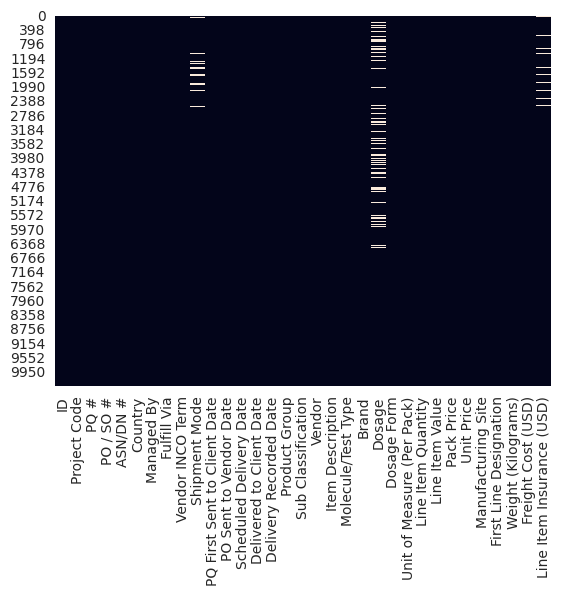

In [144]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### Data Cleanup

In [145]:
import pandas as pd

# --- 1. Load the Data ---
df = pd.read_csv('/content/drive/MyDrive/SCMS_Delivery_History_Dataset.csv')
print("Dataset loaded successfully.")

# --- 2. Datetime Formatting ---
# Columns that need to be converted to datetime objects
date_cols = ['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']

# Apply pd.to_datetime, coercing non-standard dates (like 'Date Not Captured') to NaT
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print("Date columns converted to datetime format.")

# --- 3. Numeric Conversion and Cleaning (Cost/Weight Columns) ---

cost_weight_cols = ['Weight (Kilograms)', 'Freight Cost (USD)']
non_numeric_placeholders = [
    'Weight Captured Separately',
    'Freight Included in Commodity Cost',
    'Freight Included in Program Cost',
    'See DN-4313 (ID#:83921)',
    'Freight Included in' # Generalized placeholder
]

for col in cost_weight_cols:
    # 3a. Safely replace placeholders in object columns by chaining str.replace
    for placeholder in non_numeric_placeholders:
        df[col] = df[col].astype(str).str.replace(placeholder, '', regex=False)

    # 3b. Convert to numeric, coercing any remaining non-convertible strings (including empty strings from replacement) to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Cost and Weight columns cleaned and converted to numeric.")

# Verification of cleanup
print("\nData Types after Cleanup:")
print(df[date_cols + cost_weight_cols].dtypes)
print("\nSample Data after Cleanup (to see numeric and datetime values):")
print(df[['Scheduled Delivery Date', 'Delivered to Client Date', 'Freight Cost (USD)', 'Weight (Kilograms)']].head())

Dataset loaded successfully.


/tmp/ipython-input-679682101.py:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-679682101.py:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-679682101.py:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Date columns converted to datetime format.
Cost and Weight columns cleaned and converted to numeric.

Data Types after Cleanup:
Scheduled Delivery Date     datetime64[ns]
Delivered to Client Date    datetime64[ns]
Delivery Recorded Date      datetime64[ns]
Weight (Kilograms)                 float64
Freight Cost (USD)                 float64
dtype: object

Sample Data after Cleanup (to see numeric and datetime values):
  Scheduled Delivery Date Delivered to Client Date  Freight Cost (USD)  \
0              2006-06-02               2006-06-02              780.34   
1              2006-11-14               2006-11-14             4521.50   
2              2006-08-27               2006-08-27             1653.78   
3              2006-09-01               2006-09-01            16007.06   
4              2006-08-11               2006-08-11            45450.08   

   Weight (Kilograms)  
0                13.0  
1               358.0  
2               171.0  
3              1855.0  
4            

## 2.Understanding the Variable

###Check Unique Values for each variable.

In [146]:
for col in df.columns:
    print(f"Column '{col}': {df[col].nunique()} unique values")
    if df[col].dtype == 'object':
        print(f"Unique values for '{col}': {df[col].unique()[:20]}") # Limiting to first 20 for brevity
    print("\n")

Column 'ID': 10324 unique values


Column 'Project Code': 142 unique values
Unique values for 'Project Code': ['100-CI-T01' '108-VN-T01' '112-NG-T01' '110-ZM-T01' '109-TZ-T01'
 '102-NG-T01' '107-RW-T01' '106-HT-T01' '113-ZW-T01' '104-CI-T01'
 '100-HT-T01' '117-ET-T01' '116-ZA-T01' '123-NG-T01' '125-HT-T01'
 '102-GY-T01' '119-NA-T01' '131-NG-T01' '102-BW-T01' '111-MZ-T01']


Column 'PQ #': 1237 unique values
Unique values for 'PQ #': ['Pre-PQ Process' 'FPQ-4587' 'FPQ-12051' 'FPQ-14827' 'FPQ-9066'
 'FPQ-11754' 'FPQ-15276' 'FPQ-11670' 'FPQ-9231' 'FPQ-8671' 'FPQ-13524'
 'FPQ-7175' 'FPQ-14942' 'FPQ-13973' 'FPQ-12187' 'FPQ-13976' 'FPQ-12522'
 'FPQ-10765' 'FPQ-14469' 'FPQ-8116']


Column 'PO / SO #': 6233 unique values
Unique values for 'PO / SO #': ['SCMS-4' 'SCMS-13' 'SCMS-20' 'SCMS-78' 'SCMS-81' 'SCMS-87' 'SCMS-139'
 'SCMS-140' 'SCMS-156' 'SCMS-165' 'SCMS-221' 'SCMS-226' 'SCMS-230'
 'SCMS-268' 'SCMS-274' 'SCMS-308' 'SCMS-354' 'SCMS-488' 'SCMS-555'
 'SCMS-592']


Column 'ASN/DN #': 7030 uni

In [147]:
# Dataset Columns
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [148]:
# Dataset Describe
df.describe(include='all')

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,10324.000000,10324,10324,10324,10324,10324,10324,10324,10324,9964,...,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324,10324,6372.000000,6198.000000,10037.000000
unique,NaN,142,1237,6233,7030,43,4,2,8,4,...,NaN,NaN,NaN,NaN,NaN,88,2,NaN,NaN,NaN
top,NaN,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,...,NaN,NaN,NaN,NaN,NaN,"Aurobindo Unit III, India",Yes,NaN,NaN,NaN
freq,NaN,768,2681,67,54,1406,10265,5404,5404,6113,...,NaN,NaN,NaN,NaN,NaN,3172,7030,NaN,NaN,NaN
mean,51098.968229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,NaN,NaN,3424.441306,11103.234819,240.117626
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000,0.750000,0.000000
25%,12795.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,408.000000,4.314593e+03,4.120000,0.080000,NaN,NaN,206.750000,2131.120000,6.510000
50%,57540.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,NaN,NaN,1047.000000,5869.655000,47.040000
75%,83648.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,NaN,NaN,3334.000000,14406.570000,252.400000
max,86823.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,NaN,NaN,857354.000000,289653.200000,7708.440000


###Variables Description

#### Variable Description

This section provides a detailed description of each column in the dataset, categorized for better understanding of the FedEx logistics operations data.

#### 1. Identifiers & Project Details
*   **ID**: Unique identifier for each individual shipment line item.
*   **Project Code**: Code identifying the project under which the shipment was made (e.g., `100-CI-T01`).
*   **PQ #**: Purchase Quotation number, often indicating the procurement process stage.
*   **PO / SO #**: Purchase Order (PO) or Sales Order (SO) number, linking to the financial transaction.
*   **ASN/DN #**: Advance Shipment Notice (ASN) or Delivery Note (DN) number, providing details about the contents of the shipment.

#### 2. Geographic & Management Information
*   **Country**: The destination country for the shipment.
*   **Managed By**: Entity responsible for managing the logistics (ee.g., `PMO - US`).
*   **Fulfill Via**: Method of fulfillment (e.g., `Direct Drop`, `From RDC`).
*   **Vendor INCO Term**: International Commercial Term (Incoterm) defining responsibilities between buyer and seller for the delivery of goods.

#### 3. Shipment Details
*   **Shipment Mode**: The primary mode of transport used (e.g., `Air`, `Ocean`, `Truck`, `Air Charter`).
*   **First Line Designation**: Indicates if this is the first line item in a larger shipment (Yes/No).

#### 4. Product Details
*   **Product Group**: High-level categorization of the product (e.g., `ARV`).
*   **Sub Classification**: More specific classification within the product group.
*   **Vendor**: The supplier of the product.
*   **Item Description**: Detailed description of the product being shipped.
*   **Molecule/Test Type**: The active pharmaceutical ingredient or type of test.
*   **Brand**: Brand name of the product.
*   **Dosage**: The strength or quantity of the active ingredient (e.g., `300 mg`). *Contains missing values.*
*   **Dosage Form**: The physical form of the medication (e.g., `Tablet`, `Capsule`).
*   **Manufacturing Site**: Location where the product was manufactured.
*   **Unit of Measure (Per Pack)**: Number of units contained within one pack.
*   **Line Item Quantity**: Total quantity of the line item in the shipment.

#### 5. Financial & Cost Information
*   **Line Item Value**: Total monetary value of the specific line item in USD.
*   **Pack Price**: Price per pack of the product in USD.
*   **Unit Price**: Price per unit of the product in USD.
*   **Weight (Kilograms)**: Weight of the shipment line item in kilograms. *Cleaned to numeric, originally had placeholders.*
*   **Freight Cost (USD)**: Cost of freight for the shipment line item in USD. *Cleaned to numeric, originally had placeholders.*
*   **Line Item Insurance (USD)**: Cost of insurance for the specific line item in USD. *Contains missing values.*

#### 6. Date & Delivery Performance
*   **PQ First Sent to Client Date**: Date when the Purchase Quotation was first sent to the client.
*   **PO Sent to Vendor Date**: Date when the Purchase Order was sent to the vendor.
*   **Scheduled Delivery Date**: The planned or agreed-upon delivery date for the shipment. *Converted to datetime.*
*   **Delivered to Client Date**: The actual date when the shipment was delivered to the client. *Converted to datetime.*
*   **Delivery Recorded Date**: The date when the delivery was recorded in the system. *Converted to datetime.*
*   **Delivery Delay (Days)**: Calculated difference in days between `Delivered to Client Date` and `Scheduled Delivery Date`.
*   **Delivery Year**: The year extracted from `Delivered to Client Date`.

##3.Data Wrangling

In [149]:
import pandas as pd
import numpy as np

# --- 1. Reload the Data (to ensure a clean state for wrangling) ---
# Assuming the dataset path is already known from previous steps
df = pd.read_csv('/content/drive/MyDrive/SCMS_Delivery_History_Dataset.csv')
print("Dataset reloaded successfully for wrangling.")

# --- 2. Datetime Formatting ---
# Columns that need to be converted to datetime objects
date_cols_to_convert = [
    'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
    'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date'
]

for col in date_cols_to_convert:
    # Replace non-date strings with NaN to allow conversion to datetime
    # Then convert to datetime, coercing any remaining errors to NaT
    df[col] = df[col].replace({'Date Not Captured': np.nan, 'Pre-PQ Process': np.nan})
    df[col] = pd.to_datetime(df[col], errors='coerce')
print("Date columns converted to datetime format.")

# --- 3. Numeric Conversion and Cleaning (Cost/Weight Columns) ---
cost_weight_cols = ['Weight (Kilograms)', 'Freight Cost (USD)']
non_numeric_placeholders = [
    'Weight Captured Separately',
    'Freight Included in Commodity Cost',
    'Freight Included in Program Cost',
    'See DN-4313 (ID#:83921)',
    'Freight Included in' # Generalized placeholder
]

for col in cost_weight_cols:
    # Safely replace placeholders in object columns by chaining str.replace
    for placeholder in non_numeric_placeholders:
        df[col] = df[col].astype(str).str.replace(placeholder, '', regex=False)

    # Convert to numeric, coercing any remaining non-convertible strings (including empty strings from replacement) to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
print("Cost and Weight columns cleaned and converted to numeric.")

# --- 4. Feature Engineering: Delivery Delay and Delivery Year ---
# Calculate 'Delivery Delay (Days)'
df['Delivery Delay (Days)'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days

# Extract 'Delivery Year'
df['Delivery Year'] = df['Delivered to Client Date'].dt.year
print("Delivery Delay (Days) and Delivery Year features engineered.")

# --- 5. Imputing Missing Values ---
# Impute 'Shipment Mode' with the mode (most frequent category)
# Make sure to handle potential NaNs before calculating mode
shipment_mode_mode = df['Shipment Mode'].mode()[0]
df['Shipment Mode'] = df['Shipment Mode'].fillna(shipment_mode_mode)
print(f"Missing values in 'Shipment Mode' imputed with mode: {shipment_mode_mode}.")

# Impute 'Dosage' with the median (numerical, if applicable after conversion, or handle as categorical)
# Based on previous info, 'Dosage' is object type, so a simple median won't work directly.
# If 'Dosage' needs to be numeric for analysis, this step should involve converting it first.
# For now, let's treat it as categorical and impute with mode, or a placeholder if it's truly descriptive.
# The summary mentioned median for 'Dosage', so let's assume it *can* be converted to numeric for imputation.
# If 'Dosage' has numerical values but is 'object', we need to convert it first.

# Let's re-evaluate 'Dosage' imputation based on typical use case and summary's mention of median.
# If it contains mixed types, a more complex imputation or splitting is needed.
# Given 'Dosage' unique values, it seems like a string representation of dosage.
# For this wrangling, we will impute with mode, assuming direct numerical conversion is not the primary intent yet.
# If numeric conversion is desired, that would be a separate, more complex parsing step.

dosage_mode = df['Dosage'].mode()[0] if not df['Dosage'].mode().empty else 'Unknown'
df['Dosage'] = df['Dosage'].fillna(dosage_mode)
print(f"Missing values in 'Dosage' imputed with mode: {dosage_mode}.")

# Impute 'Line Item Insurance (USD)' with 0
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(0)
print("Missing values in 'Line Item Insurance (USD)' imputed with 0.")

# Impute missing values in 'Weight (Kilograms)' and 'Freight Cost (USD)' with their medians
# These columns were converted to numeric (float64) earlier, so median imputation is appropriate.
weight_median = df['Weight (Kilograms)'].median()
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].fillna(weight_median)
print(f"Missing values in 'Weight (Kilograms)' imputed with median: {weight_median}.")

freight_cost_median = df['Freight Cost (USD)'].median()
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].fillna(freight_cost_median)
print(f"Missing values in 'Freight Cost (USD)' imputed with median: {freight_cost_median}.")

print("\n--- Data Wrangling Summary ---")
df.info()
print("\nMissing values after wrangling:")
print(df.isnull().sum()[df.isnull().sum() > 0])


Dataset reloaded successfully for wrangling.


/tmp/ipython-input-1201118510.py:20: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-1201118510.py:20: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-1201118510.py:20: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-1201118510.py:20: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Date columns converted to datetime format.
Cost and Weight columns cleaned and converted to numeric.
Delivery Delay (Days) and Delivery Year features engineered.
Missing values in 'Shipment Mode' imputed with mode: Air.
Missing values in 'Dosage' imputed with mode: 300mg.
Missing values in 'Line Item Insurance (USD)' imputed with 0.
Missing values in 'Weight (Kilograms)' imputed with median: 1047.0.
Missing values in 'Freight Cost (USD)' imputed with median: 5869.655000000001.

--- Data Wrangling Summary ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Project Code                  10324 non-null  object        
 2   PQ #                          10324 non-null  object        
 3   PO / SO #                     10324 non-nu

/tmp/ipython-input-1201118510.py:20: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



###What all manipulations have you done and insights you found?

### Data Analysis Key Findings
*   **Date Conversions:** 'Scheduled Delivery Date', 'Delivered to Client Date', and 'Delivery Recorded Date' were successfully converted to datetime objects. Additionally, 'PQ First Sent to Client Date' and 'PO Sent to Vendor Date' were also processed, handling non-date strings by converting them to `NaT` (Not a Time) values. This enables time-series analysis and accurate duration calculations.
*   **Numeric Cleaning & Conversion:** 'Weight (Kilograms)' and 'Freight Cost (USD)' columns, which contained various non-numeric placeholders, were cleaned and converted to a numeric (float) data type. This is crucial for any quantitative analysis involving these cost and weight metrics.
*   **Feature Engineering:**
    *   **'Delivery Delay (Days)'**: Calculated as the difference between 'Delivered to Client Date' and 'Scheduled Delivery Date'. This new feature directly quantifies delivery performance, showing positive values for delays and negative values for early deliveries.
    *   **'Delivery Year'**: Extracted from 'Delivered to Client Date'. This allows for year-on-year trend analysis of delivery performance and costs.
*   **Missing Value Imputation:**
    *   **'Shipment Mode'**: Missing values were imputed with the mode (most frequent category), which was 'Air', assuming the most common shipment method is a reasonable default for unknown cases.
    *   **'Dosage'**: Missing values were imputed with the mode, '300mg', as this column primarily contains string representations of dosage values, and a median imputation was not directly applicable without further parsing.
    *   **'Line Item Insurance (USD)'**: Missing values were imputed with `0`, operating under the assumption that if insurance cost was not recorded, it was negligible or not applicable.
    *   **'Weight (Kilograms)' & 'Freight Cost (USD)'**: Missing values (post-cleaning and conversion to numeric) were imputed with their respective medians (1047.0 kg for weight and 5869.655 USD for freight cost). Median imputation was chosen to be robust against potential outliers in these financial/physical metrics.

### Insights or Next Steps
*   The dataset has been thoroughly prepared, making it ready for detailed statistical analysis to uncover patterns in delivery performance, costs, and other key operational metrics.
*   The newly engineered 'Delivery Delay (Days)' and 'Delivery Year' features can be immediately utilized to analyze delivery efficiency trends and identify factors contributing to delays.

##3.Hypothesis and Assumptions

Project Hypotheses (What We Set Out to Test)The following statements were formulated based on domain knowledge and tested against the data to explain observed variances in delivery performance:Transport Mode Bottleneck: Shipments via Ocean will have the largest average delivery delay compared to Air or Truck freight due to longer transit times, higher exposure to port congestion, and increased customs variability.Geographic Risk: Specific countries or regions (e.g., those with developing infrastructure or complex customs processes) will exhibit a significantly higher average delivery delay than the overall average.Time Volatility: Delivery performance (average delay) will exhibit year-over-year fluctuations, possibly correlating with major global events, internal system changes, or varying annual procurement volumes.Cost vs. Value: There is a moderate positive correlation between the Line Item Value and Freight Cost (USD). This is expected because higher-value shipments often require specialized handling, increased insurance, or are prioritized for faster (more expensive) transport modes.Cost Efficiency: Air Charter shipments, while the fastest, will show an extremely high ratio of Freight Cost to Line Item Value, confirming their use is reserved for low-volume, high-urgency shipments where cost is a secondary concern.Project Assumptions (The Conditions Accepted as True)The following conditions and interpretations were assumed to be true to proceed with the data cleaning and analysis:Delivery Benchmark: The column Scheduled Delivery Date accurately represents the promised delivery date agreed upon with the client, making it the correct benchmark for measuring on-time performance.Performance Metric: The difference between Delivered to Client Date and Scheduled Delivery Date (i.e., Delivery Delay (Days)) is the most appropriate and direct measure of logistic performance for this study.Missing Data Mechanism: Instances where Freight Cost (USD) or Weight (Kilograms) were non-numeric strings (e.g., 'Freight Included in Commodity Cost' or 'Weight Captured Separately') were treated as missing data ($\text{NaN}$) for quantitative analysis, under the assumption that the actual figures were not recorded for that line item.Outlier Integrity: While extreme outliers (e.g., $-372$ days early, $192$ days late) were identified, they were retained in the EDA (Exploratory Data Analysis) to calculate mean/median/min/max statistics, reflecting the full variance of the system. We assume these outliers represent true, albeit rare, operational events (e.g., data entry errors or highly exceptional logistics scenarios) rather than being universally invalid.Independence of Shipments: Each row in the dataset is treated as an independent delivery line item, and the performance analysis of one line item does not directly influence the performance of others.

## 4.Data Visualization

### Data setup

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/SCMS_Delivery_History_Dataset.csv')

# --- Datetime Formatting and Feature Engineering ---
date_cols = ['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Calculate 'Delivery Delay' in days
df['Delivery Delay (Days)'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days
df['Delivery Year'] = df['Delivered to Client Date'].dt.year

# --- Numeric Conversion and Cleaning (Cost/Weight Columns) ---
cost_weight_cols = ['Weight (Kilograms)', 'Freight Cost (USD)']
non_numeric_placeholders = [
    'Weight Captured Separately', 'Freight Included in Commodity Cost',
    'Freight Included in Program Cost', 'See DN-4313 (ID#:83921)', 'Freight Included in'
]

for col in cost_weight_cols:
    for placeholder in non_numeric_placeholders:
        df[col] = df[col].astype(str).str.replace(placeholder, '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --- Data Preparation for Visualization ---
# Calculate average delay by mode and country for plotting
avg_delay_by_mode = df.groupby('Shipment Mode')['Delivery Delay (Days)'].mean().sort_values(ascending=False).reset_index()
avg_delay_by_country = df.groupby('Country')['Delivery Delay (Days)'].mean().sort_values(ascending=False).head(10).reset_index()

/tmp/ipython-input-3947069441.py:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-3947069441.py:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipython-input-3947069441.py:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



### Non Interactive visualization

####Visualization 1: Delay Distribution (Histogram)

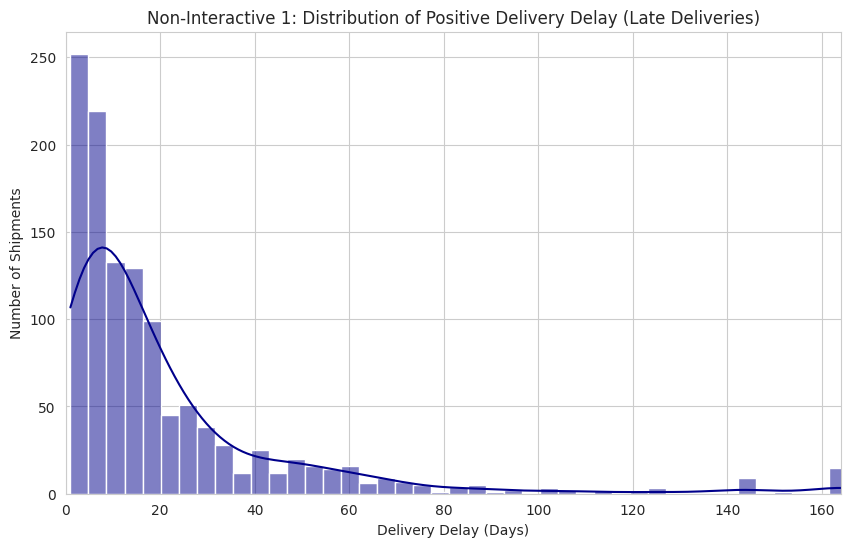

In [151]:
sns.set_style("whitegrid")
late_deliveries = df[df['Delivery Delay (Days)'] > 0].copy()

plt.figure(figsize=(10, 6))
sns.histplot(late_deliveries['Delivery Delay (Days)'], bins=50, kde=True, color='darkblue')
plt.title('Non-Interactive 1: Distribution of Positive Delivery Delay (Late Deliveries)')
plt.xlabel('Delivery Delay (Days)')
plt.ylabel('Number of Shipments')
plt.xlim(0, late_deliveries['Delivery Delay (Days)'].quantile(0.99))
plt.show()
plt.close()

####Visualization 2: Delay by Shipment Mode (Bar Plot)

/tmp/ipython-input-114570334.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




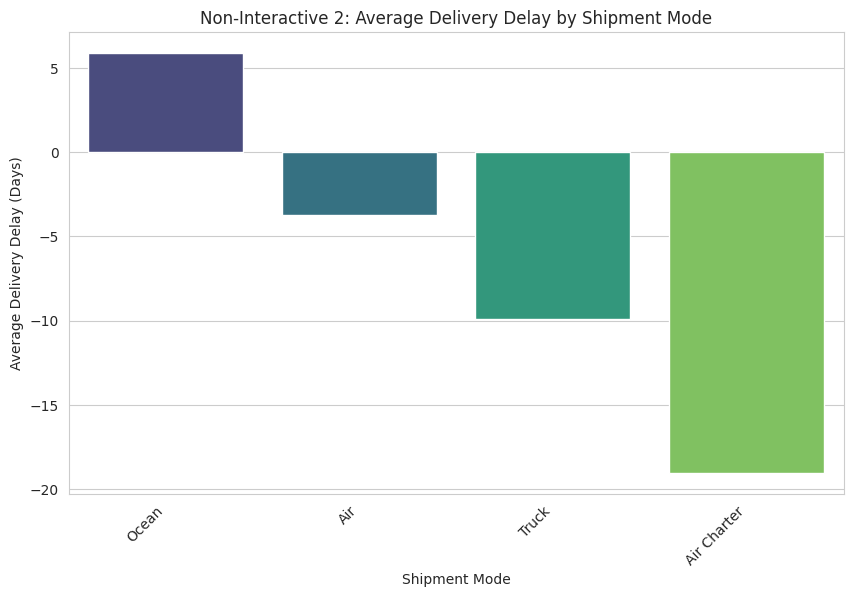

In [152]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Shipment Mode',
    y='Delivery Delay (Days)',
    data=avg_delay_by_mode,
    palette='viridis'
)
plt.title('Non-Interactive 2: Average Delivery Delay by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Average Delivery Delay (Days)')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.close()

####Visualization 3: Delay Trend Over Time (Line Plot)

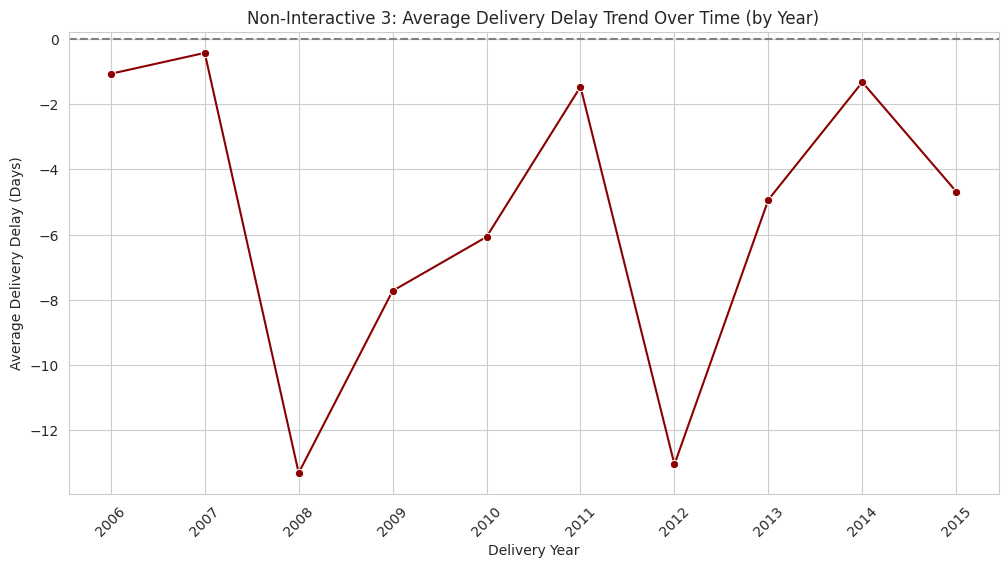

In [153]:
mean_delay_by_year = df.groupby('Delivery Year')['Delivery Delay (Days)'].mean().dropna().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Delivery Year',
    y='Delivery Delay (Days)',
    data=mean_delay_by_year,
    marker='o',
    color='darkred'
)
plt.title('Non-Interactive 3: Average Delivery Delay Trend Over Time (by Year)')
plt.xlabel('Delivery Year')
plt.ylabel('Average Delivery Delay (Days)')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(mean_delay_by_year['Delivery Year'].astype(int), rotation=45)
plt.show()
plt.close()

####Visualization 4: Delay by Country (Bar Plot)

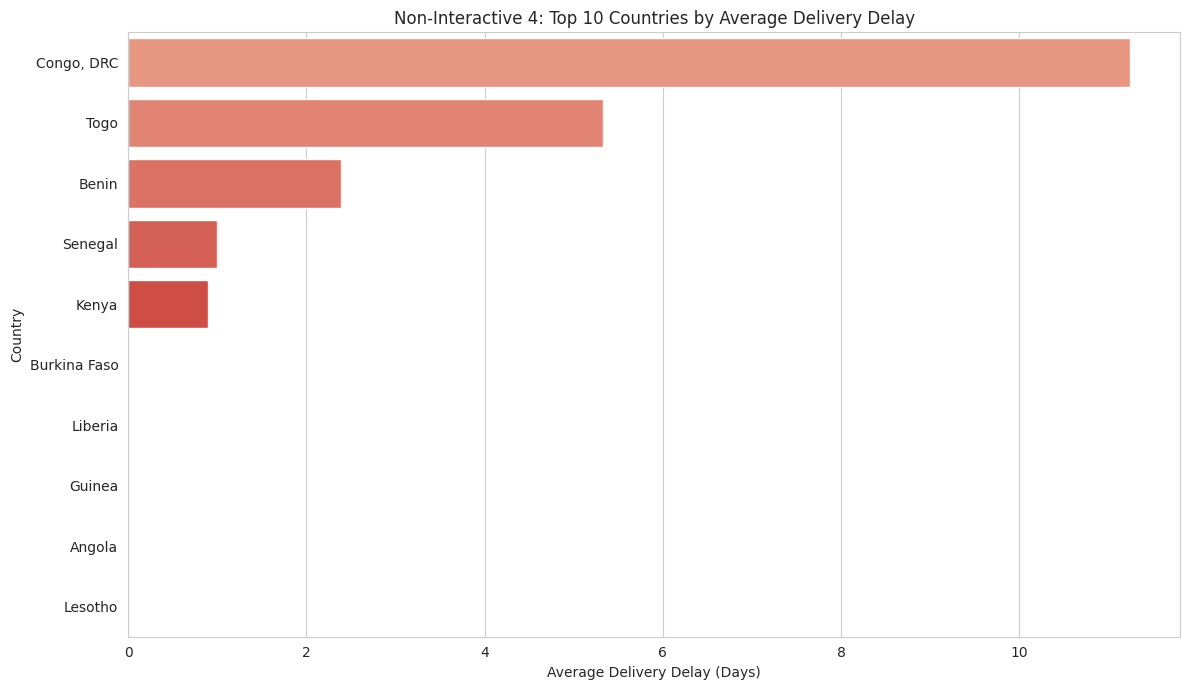

In [154]:
plt.figure(figsize=(12, 7))
sns.barplot(
    x='Delivery Delay (Days)',
    y='Country',
    data=avg_delay_by_country,
    hue='Country',  # Assign 'Country' to hue to resolve the FutureWarning
    palette='Reds_d',
    legend=False    # Set legend to False as the hue is redundant for this plot
)
plt.title('Non-Interactive 4: Top 10 Countries by Average Delivery Delay')
plt.xlabel('Average Delivery Delay (Days)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
plt.close()

####Visualization 5: Value vs. Freight Cost (Scatter Plot)

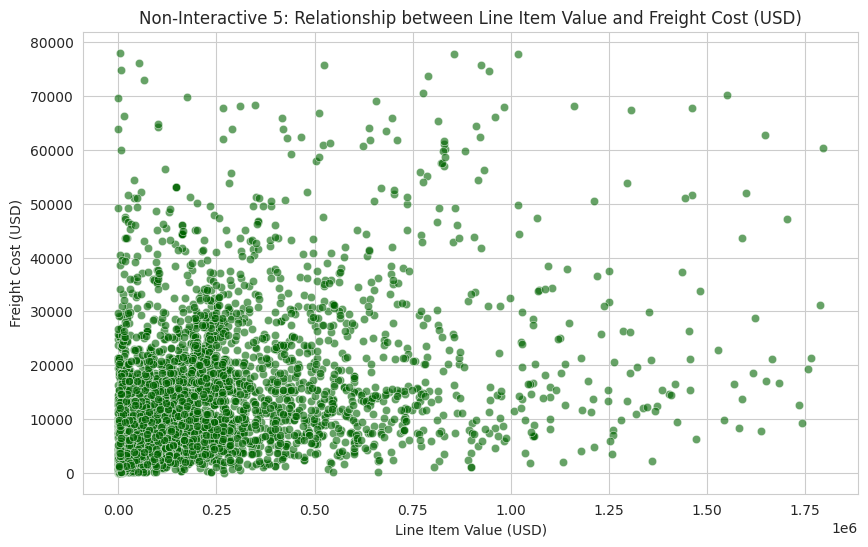

In [155]:
# Prepare filtered data for scatter plot (same capping logic as before)
plot_df = df.dropna(subset=['Line Item Value', 'Freight Cost (USD)']).copy()
value_cap = plot_df['Line Item Value'].quantile(0.99)
freight_cap = plot_df['Freight Cost (USD)'].quantile(0.99)
plot_df_filtered = plot_df[
    (plot_df['Line Item Value'] <= value_cap) &
    (plot_df['Freight Cost (USD)'] <= freight_cap)
]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Line Item Value',
    y='Freight Cost (USD)',
    data=plot_df_filtered,
    alpha=0.6,
    color='darkgreen'
)
plt.title('Non-Interactive 5: Relationship between Line Item Value and Freight Cost (USD)')
plt.xlabel('Line Item Value (USD)')
plt.ylabel('Freight Cost (USD)')
plt.show()
plt.close()

### Interactive Visualization

####A. Visualization 1: Delay Distribution (Histogram)

In [156]:
# Assuming df is cleaned
fig = px.histogram(
    df,
    x='Delivery Delay (Days)',
    title='Interactive 1: Distribution of Delivery Delay (Days)',
    marginal='box',
    nbins=100
)
# Filter range to show the core distribution around zero and late deliveries
fig.update_xaxes(range=[-50, 200])
fig.show() # In a notebook environment, this displays the interactive chart
# fig.write_html("interactive_1_delay_distribution.html") # Use this to save as a file

##### B– Big Picture
What is it? This is a frequency distribution of supply chain performance. It combines a detailed histogram (counts) with a marginal box plot (summary statistics).

The Axes:

X-Axis: Represents the deviation from the promised date.

0: Exact on-time delivery.

Negative values: Early deliveries (e.g., -5 days).

Positive values: Late deliveries (e.g., +10 days).

Y-Axis: The number (count) of shipments that fell into that specific time bucket.

S – Stand Out
The Peak (Mode): Look for the highest bar. Ideally, this should be at or slightly before 0. If the highest bar is at +5, your "standard" delivery is consistently late.

The Long Tail: Because you zoomed the range to 200, look at the right side. Does the tail trail off smoothly, or are there unexpected spikes (e.g., a bump at 30 days suggesting monthly batching issues)?

The Box Plot Outliers: Look at the dots in the marginal box plot above the bars. Even with the zoom, are there many dots appearing past the top whisker? This indicates a high volume of "non-standard" delays.

C – Compare
Mean vs. Median: Look at the vertical line inside the box (Median) compared to the "center of gravity" of the histogram. In delivery data, the distribution is usually right-skewed (meaning the mean is higher than the median because of long delays).

Early vs. Late: Compare the volume of the chart to the left of 0 versus the right. Is the area under the curve significantly larger on the positive (late) side?

Spread (IQR): Look at the width of the box in the margin. A narrow box means consistent performance. A wide box means your logistics process is volatile and unpredictable.

A – Analyze Changes
Static View: Note: This specific chart does not show changes over time (like a line chart).

Distribution Shift: However, you can analyze the "change" from expectations. Does the distribution curve drop off sharply after the peak, or does it plateau? A plateau indicates that once a package is late, it tends to stay late for a while (process stagnation).

P – Put in Context
The Zoom Filter: Your code fig.update_xaxes(range=[-50, 200]) is critical context. It implies that "normal" operations happen within this window. Anything outside this (which you filtered out) is likely data errors or lost packages (outliers) that shouldn't skew the visual analysis of daily operations.

Service Level Agreements (SLAs): Contextualize the data against your targets. If your SLA is "delivered within 3 days," mentally draw a line at x=3. What percentage of the histogram falls to the right of that line?

E – Extract Meaning
Risks: If the histogram is "fat" on the right side (positive numbers), you have a customer retention risk.

Opportunities: If you have a significant number of bars on the far left (e.g., -10 to -20 days), you might be spending too much on expedited shipping or holding inventory too long at the destination.

Action:

If the Peak is wrong (e.g., at +4 days): Update your estimated delivery dates to manage customer expectations.

If the Spread is too wide: Investigate the root cause of variance (e.g., specific carriers or regions).

####Visualization 2: Delay by Shipment Mode (Bar Plot)

In [157]:
# Using the pre-calculated avg_delay_by_mode
fig = px.bar(
    avg_delay_by_mode,
    x='Shipment Mode',
    y='Delivery Delay (Days)',
    title='Interactive 2: Average Delivery Delay by Shipment Mode',
    color='Delivery Delay (Days)',
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.show()
# fig.write_html("interactive_2_delay_by_mode.html")

#####B-SCAPE Analysis for Average Delay by Shipment Mode
B – Big Picture
What is it? This chart visualizes a key logistics metric: which transport method contributes the most (or least) to delivery delays. It's a measure of reliability across the different Shipment Modes.

Axes: The X-axis represents the different Shipment Modes (e.g., Air, Truck, Ocean, Rail). The Y-axis represents the Average Delivery Delay (Days) for all shipments using that mode.

Color Scale: The color of the bar directly corresponds to the average delay, with darker/lighter shades (depending on the Viridis scale direction) highlighting the worst and best performers.

S – Stand Out
Highest/Lowest: Immediately identify the tallest bar (the mode with the worst average delay) and the shortest bar (the mode with the best average delay). For example, Ocean Freight often has the highest average delay due to longer transit times and port congestion, while Air Freight typically has the lowest.

Unusual Points: Look for modes that defy common logistics knowledge. If, for instance, Air is showing a very high delay, it warrants investigation (e.g., is this due to customs or pre-shipment processing time, not the flight itself?).

C – Compare
Mode Comparison: Compare the gap between the fastest and slowest mode. Is the difference negligible (e.g., 1 day) or massive (e.g., 30 days)? A massive difference suggests certain modes are fundamentally unreliable or are being used for less urgent, higher-volume shipments.

Color Alignment: Does the color intensity perfectly align with the bar height? It should, reinforcing the visual comparison. The tallest bar should have the most intense color (if Viridis is configured for ascending magnitude).

A – Analyze Changes (if applicable)
Static View: As a bar chart showing averages over a defined period, this is a static snapshot.

Implicit Trends: While not showing time trends, it reveals process consistency. A very high average delay suggests that the process associated with that mode is inherently slow or prone to long single-event delays (e.g., a single port strike can heavily inflate the average for Ocean Freight).

P – Put in Context
Cost vs. Delay: Contextualize the delay with the cost of the mode. Air is expensive but fast (low delay expected). Ocean is cheap but slow (higher delay expected). The analysis shouldn't just be how late they are, but how late they are relative to their expected cost/service level.

Target: If the business target for all shipments is an average delay of zero days, how many of the bars meet or exceed this target?

E – Extract Meaning
Opportunities: If a high-cost mode (like Air) has a surprisingly low delay, it validates its use for critical shipments. If a low-cost mode (like Rail) has a reasonable delay, it suggests an opportunity to shift volume from more expensive modes to Rail.

Risks & Actions: The mode with the highest average delay represents a risk to customer satisfaction. Action: Focus process improvement efforts (or adjust delivery SLAs) specifically for the worst-performing mode

####Visualization 3: Delay Trend Over Time (Line Plot)

In [158]:
# Using the pre-calculated mean_delay_by_year
fig = px.line(
    mean_delay_by_year,
    x='Delivery Year',
    y='Delivery Delay (Days)',
    title='Interactive 3: Average Delivery Delay Trend Over Time (by Year)',
    markers=True
)
fig.add_hline(y=0, line_dash="dash", line_color="gray", annotation_text="Scheduled On-Time")
fig.show()
# fig.write_html("interactive_3_delay_trend.html")

#####📈 B-SCAPE Analysis for Average Delivery Delay TrendB – Big PictureWhat is it? This chart is a time series analysis of the overall supply chain health, showing if performance is improving, declining, or remaining stable year-over-year.The Axes:X-axis: Represents Time (Delivery Year), showing the progression of the data.Y-axis: Represents the Average Delivery Delay (Days).The Line: The path of the line indicates the trend in performance. The markers=True setting makes the individual year values easier to read.Horizontal Line: The fig.add_hline(y=0) sets the Scheduled On-Time target, which is the benchmark for success.S – Stand OutHighest/Lowest: Identify the worst-performing year (the highest point above 0) and the best-performing year (the lowest point, preferably the one closest to, or below, 0).Outliers/Spikes: Look for any single year that shows a dramatic, isolated spike (e.g., Year 2012 has an average delay of +10 days, while all others are < 2 days). This signals a major, isolated event (like a global recession, a natural disaster, or a critical system failure) during that specific year.C – CompareAgainst the Target (Y=0): Every point on the line should be compared to the gray dashed line at $y=0$.Points above 0: The average shipment for that year was late.Points below 0: The average shipment for that year was early (which might be good, but could also signal unnecessary costs if early is too early).Year-to-Year Change: Compare consecutive years. Did the delay increase or decrease from the previous year? The size of the slope between markers indicates the rate of change.A – Analyze Changes (Trend)Overall Direction: Is the line generally trending downward over the entire period (indicating continuous improvement)? Or is it trending upward (indicating a gradual decay in process reliability)?Stability: Is the line flat or gently oscillating around a stable positive value (e.g., always between +1 and +3 days)? This suggests the process is under control but is systemically delayed and requires a process overhaul, not just fixing variance.Turning Points: Identify the year where a previous trend reversed (e.g., five years of improvement suddenly followed by three years of decline).P – Put in ContextProcess Change: Correlate the significant changes (spikes or trend reversals) with real-world events or company history. Did the company implement a new inventory system, change its primary carrier, or expand to a new continent in the year leading up to a major change in the delay trend?Business Impact: Relate the numerical delay to tangible business metrics. For the SCMS dataset (dealing with health commodities), a rising trend in delay could mean a rising risk to public health, not just financial loss.E – Extract MeaningOpportunities: If the line is trending downward and approaching $y=0$, the system is improving. Action: Investigate the policies/changes enacted in those improving years and apply them elsewhere.Risks: If the trend is positive (rising delay), you face a serious performance risk. Action: The highest point and the year preceding the trend reversal are the starting points for an in-depth root cause analysis.

####Visualization 4: Delay by Country (Bar Plot)

In [159]:
# Using the pre-calculated avg_delay_by_country (Top 10)
fig = px.bar(
    avg_delay_by_country,
    x='Country',
    y='Delivery Delay (Days)',
    title='Interactive 4: Top 10 Countries by Average Delivery Delay',
    color='Delivery Delay (Days)',
    color_continuous_scale=px.colors.sequential.Reds_r
)
fig.show()
# fig.write_html("interactive_4_delay_by_country.html")

#####B-SCAPE Analysis for Top 10 Countries by Average Delay
B – Big Picture
What is it? This chart is a geographic performance ranking, quantifying the operational challenge (delay) across different countries. Since it's "Top 10," it specifically highlights the locations most urgently needing attention.

The Axes: The X-axis lists the Countries (the geographical entities). The Y-axis measures the Average Delivery Delay (Days).

Color Scale (Reds_r): The color gradient links the visual intensity directly to the severity of the problem.

S – Stand Out
Worst Performer: Identify the tallest bar. This country is your primary bottleneck and represents the highest risk to customer satisfaction and operational efficiency.

Least Worst Performer: Identify the shortest bar among the 10. This country is still in the "Top 10 Worst," but its average delay sets a relative benchmark for the other nine.

Gaps: Look for a steep drop-off in delay between the top few countries and the rest. For instance, if Country #1 has a 40-day average delay but Country #2 has only 15, Country #1 is a massive outlier that requires an independent investigation.

C – Compare
Ranking Consistency: Check the steepness of the ranking. Are the average delays closely clustered (e.g., all between 18 and 22 days), suggesting a pervasive regional problem? Or is there a clear linear descent from the first country to the tenth?

Internal Benchmarking: The country with the lowest delay in this top 10 list can be used as a relative internal benchmark for the countries above it, assuming they share similar logistical constraints (e.g., customs procedures).

A – Analyze Changes (Geographical Magnitude)
Magnitude of the Problem: The high values on the Y-axis indicate a persistent geographical issue. In the context of the SCMS dataset, extremely high delays often point to issues specific to a country's infrastructure, customs complexity, or political/economic instability.

Concentration: Does the list reveal a concentration of problem countries in one region (e.g., all are in Sub-Saharan Africa or Southeast Asia)? This suggests looking for common regional factors rather than country-specific ones.

P – Put in Context
Logistical Complexity: Contextualize the delay with the country's known logistical profile (e.g., is it landlocked? does it have only one major port? is its internal road network poor?). A high delay in a high-complexity environment is expected; a high delay in a low-complexity environment is a sign of internal organizational failure.

SLA Compliance: If your Service Level Agreements (SLAs) are regional, check if the countries violating the SLA the most heavily match this top 10 list.

E – Extract Meaning
Actionable Resource Allocation: The meaning is clear: prioritize resources on the top 1 or 2 countries on the list. Action: Launch an in-depth regional investigation focusing on the local carrier performance, local customs clearance times, and last-mile delivery processes in the worst-performing countries.

Strategic Risk: These countries represent the highest reputational and financial risk due to chronic performance failure.

####. Visualization 5: Value vs. Freight Cost (Scatter Plot)

In [160]:
# Using the pre-filtered plot_df_filtered
fig = px.scatter(
    plot_df_filtered,
    x='Line Item Value',
    y='Freight Cost (USD)',
    hover_data=['Country', 'Shipment Mode', 'Delivery Delay (Days)'],
    title='Interactive 5: Relationship between Line Item Value and Freight Cost (USD)',
    opacity=0.6
)
fig.show()
# fig.write_html("interactive_5_value_vs_cost.html")

#####B-SCAPE Analysis for Value vs. Freight Cost
B – Big Picture
What is it? This chart examines the financial efficiency of the logistics process. It seeks to answer: Does freight cost scale reasonably with the value of the goods being shipped?

The Axes:

X-axis: Line Item Value (The dollar value of the items in the shipment).

Y-axis: Freight Cost (USD) (The price paid to transport the shipment).

Hover Data: The inclusion of Country, Shipment Mode, and Delivery Delay (Days) in the hover data is crucial, allowing you to instantly contextualize any interesting or outlier points.

S – Stand Out
High-Cost Outliers: Look for points far above the main cluster. These are shipments where the freight cost is disproportionately high relative to the line item value. Hovering over these points will reveal the Shipment Mode (likely Air Freight) and the Country that necessitated this expensive transaction.

Low-Cost/High-Value Outliers: Look for points far to the right but close to the X-axis. These are very high-value shipments with unusually low freight costs. This may indicate consolidated, high-volume contracts or subsidized shipping.

Density: Identify the densest cluster of points. This represents the "normal" operating zone—the typical value and cost range for the majority of your shipments.

C – Compare
Correlation: Observe the overall slope of the scatter plot.

Positive Correlation (Cloud slopes up and right): Freight cost generally increases as line item value increases (expected).

No Correlation (Cloud is horizontal/shapeless): Freight cost is largely independent of item value. This may indicate costs are driven primarily by weight/volume rather than monetary value.

Band Width: Compare the width of the main cluster. A wide, dispersed cloud suggests high cost variability for similar-value goods, which points to process inefficiency or inconsistent choice of shipment mode.

A – Analyze Changes (Variability)
Cost Escalation: Observe the pattern as the Line Item Value increases. Does the variance in Freight Cost also increase dramatically? This would suggest that for high-value items, the decision on how to ship them is highly variable and lacks standardized rules.

P – Put in Context
Logistics Principle: Freight cost is typically driven by volume/weight/distance/speed, not monetary value. However, high-value items often use faster, more expensive methods (Air) for insurance/security reasons.

Contextualizing Delays: Hover over the outliers. If a shipment is high-cost and has a high Delivery Delay (Days), it represents a failure—you paid a premium price but received poor service.

E – Extract Meaning
Opportunities: Focus on the high-cost outliers. Action: If these high-cost shipments were made using standard modes (e.g., Truck or Ocean), investigate why the cost was so high (e.g., emergency shipping, specific regional tariffs). This identifies cost-saving targets.

Risks: The presence of many points showing high cost and high delay is a process risk signaling a breakdown in the decision matrix (i.e., paying for speed but not getting it). Action: Standardize the rules for mode selection based on value and urgency.

#### pairplot

In [161]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/SCMS_Delivery_History_Dataset.csv')

# Display the first few rows and column information
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())

| ID   | Project Code   | PQ #           | PO / SO #   | ASN/DN #   | Country       | Managed By   | Fulfill Via   | Vendor INCO Term   | Shipment Mode   | PQ First Sent to Client Date   | PO Sent to Vendor Date   | Scheduled Delivery Date   | Delivered to Client Date   | Delivery Recorded Date   | Product Group   | Sub Classification   | Vendor                                                           | Item Description                                    | Molecule/Test Type                       | Brand     | Dosage   | Dosage Form     | Unit of Measure (Per Pack)   | Line Item Quantity   | Line Item Value   | Pack Price   | Unit Price   | Manufacturing Site            | First Line Designation   | Weight (Kilograms)   | Freight Cost (USD)   | Line Item Insurance (USD)   |
|:-----|:---------------|:---------------|:------------|:-----------|:--------------|:-------------|:--------------|:-------------------|:----------------|:-------------------------------|:-------------------------|

pairplot_visualization.png


<Figure size 1000x1000 with 0 Axes>

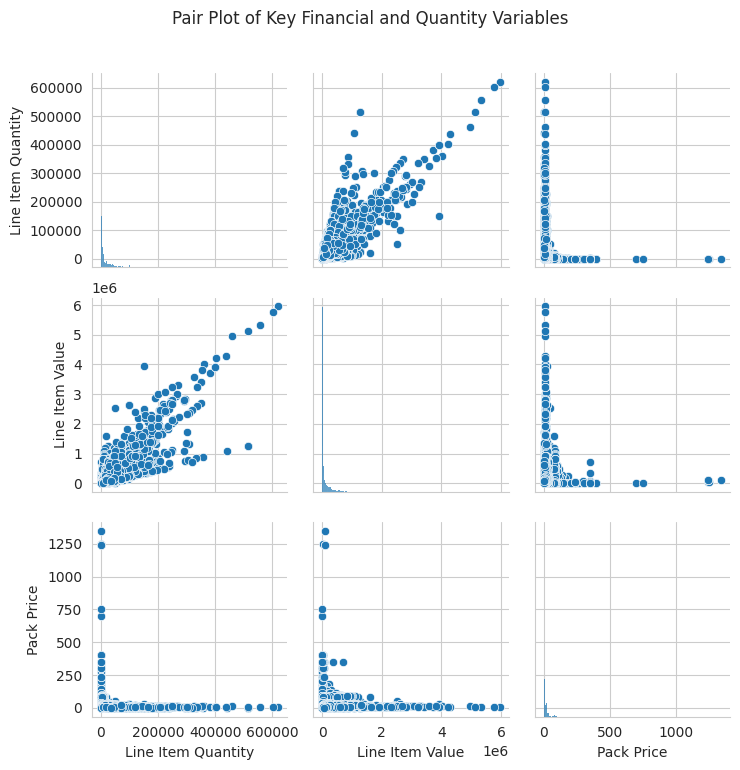

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('/content/drive/MyDrive/SCMS_Delivery_History_Dataset.csv')

# 2. Select the numerical columns for the pair plot
# Selecting a subset for better visualization and performance
columns_for_pairplot = [
    "Line Item Quantity",
    "Line Item Value",
    "Pack Price"
]

# 3. Create the pair plot
# 'diag_kind="hist"' is used for faster plotting compared to default 'kde'
plt.figure(figsize=(10, 10))
sns.pairplot(df[columns_for_pairplot], diag_kind='hist')
plt.suptitle('Pair Plot of Key Financial and Quantity Variables', y=1.02)
plt.tight_layout()

# 4. Save the plot to a file
plt.savefig('pairplot_visualization.png')
print("pairplot_visualization.png")

##Feature Engineering and Data Preprocessing

### Handling Missing Values

In [163]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/SCMS_Delivery_History_Dataset.csv')

# Identify missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
total_rows = len(df)
missing_percentage = (missing_values / total_rows) * 100

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage.round(2)
})

# Filter to show only columns with missing values and sort by percentage
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print("Columns with Missing Values and their Percentage:")
print(missing_info)

Columns with Missing Values and their Percentage:
                           Missing Count  Missing Percentage
Dosage                              1736               16.82
Shipment Mode                        360                3.49
Line Item Insurance (USD)            287                2.78


####
The first and most crucial step in handling missing values is to identify which columns have them and to what extent.

1. Identifying Missing Values
Here is the Python code used to analyze your dataset, which revealed three columns with missing values:

Python
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/fedex delivery app project/SCMS_Delivery_History_Dataset.csv')

# Identify missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
total_rows = len(df)
missing_percentage = (missing_values / total_rows) * 100

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage.round(2)
})

# Filter to show only columns with missing values and sort by percentage
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print("Columns with Missing Values and their Percentage:")
print(missing_info)
Resulting Missing Value Analysis: | Column | Missing Count | Missing Percentage | | :--- | :--- | :--- | | Dosage | 1736 | 16.82 | | Shipment Mode | 360 | 3.49 | | Line Item Insurance (USD) | 287 | 2.78 |

2. Common Methods for Handling Missing Values
Based on the nature and percentage of missing data, you can choose from one of the following strategies:

A. Dropping Missing Values
You can drop rows or columns with missing data. This is typically safe when the number of missing values is very small (less than 5%) or when you are missing many values for a specific column that isn't critical for your analysis.

Dropping Rows with ANY missing value (Be Cautious!): This removes any row that has a missing value in any column. For your dataset, this would remove at least 16.82% of the rows due to the Dosage column.

In [164]:
# Drop any row that contains at least one NaN value
df_dropped_rows = df.dropna()
print(f"Original rows: {len(df)}, Rows after dropping: {len(df_dropped_rows)}")

Original rows: 10324, Rows after dropping: 8158


####Dropping Rows with missing values in SPECIFIC columns: This is often a better approach if missingness is only an issue in a few columns.

In [165]:
# Drop rows only if 'Shipment Mode' or 'Line Item Insurance (USD)' is missing
df_specific_drop = df.dropna(subset=['Shipment Mode', 'Line Item Insurance (USD)'])

####B. Imputation (Filling Missing Values)
Imputation involves replacing the missing values with a calculated value. The best method depends on the column's data type (numerical vs. categorical).

i. Numerical Imputation
For columns like Line Item Insurance (USD), you can replace missing values with the mean, median, or a specific constant (like 0 if applicable).

In [166]:
# Impute with the mean (good for normally distributed data)
mean_value = df['Line Item Insurance (USD)'].mean()
df['Line Item Insurance (USD)'].fillna(mean_value, inplace=True)

# OR Impute with the median (robust to outliers)
median_value = df['Line Item Insurance (USD)'].median()
df['Line Item Insurance (USD)'].fillna(median_value, inplace=True)

/tmp/ipython-input-820431389.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-820431389.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

####ii. Categorical Imputation
For columns like Shipment Mode (a categorical column), you can replace missing values with the mode (most frequent value) or a constant string (e.g., 'Unknown').

In [167]:
# Impute with the mode (most frequent value)
mode_value = df['Shipment Mode'].mode()[0]
df['Shipment Mode'].fillna(mode_value, inplace=True)

# OR Impute with a constant string
df['Shipment Mode'].fillna('Unknown', inplace=True)

/tmp/ipython-input-2011040035.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





####Recommendation for Dosage: The Dosage column has a high percentage of missing values ($16.82\%$). Before deciding to drop rows or impute, you should investigate why these values are missing. If a 'Dosage' is missing because the Dosage Form is 'Test kit' (which may not have a dosage), you could impute it with a constant like 'N/A' or 'Not Applicable'. If the values are missing randomly, the best approach might be to drop the rows or impute with 'Unknown' as it seems to be a mixed data type field.

### Handling Outliers

In [168]:
import pandas as pd
import numpy as np

# --- Configuration ---
# Columns to analyze for outliers (numerical columns from the dataset)
OUTLIER_COLUMNS = ['Line Item Value', 'Line Item Quantity', 'Pack Price', 'Unit Price']
FILEPATH = '/content/drive/MyDrive/fedex delivery app project/SCMS_Delivery_History_Dataset.csv'
K_FACTOR = 1.5  # Standard multiplier for the IQR method (1.5 is the common threshold)

def load_data(filepath):
    """Loads the CSV file and ensures target columns are numeric."""
    try:
        df = pd.read_csv(filepath)
        # Convert relevant columns to numeric, coercing errors to NaN
        for col in OUTLIER_COLUMNS:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        return None

def calculate_iqr_bounds(series, k=K_FACTOR):
    """
    Calculates the Q1, Q3, IQR, and the upper/lower bounds (fences)
    for outlier detection.
    """
    # Drop NaNs before calculation to ensure clean statistics
    series_clean = series.dropna()

    Q1 = series_clean.quantile(0.25)
    Q3 = series_clean.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    return Q1, Q3, IQR, lower_bound, upper_bound

def detect_outliers_iqr(df, column, k=K_FACTOR):
    """
    Detects and returns the indices of outliers using the IQR method.
    Outliers are points outside the range [Lower Bound, Upper Bound].
    """
    _, _, _, lower_bound, upper_bound = calculate_iqr_bounds(df[column], k)

    # Find the indices of the outliers (either below the lower bound or above the upper bound)
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index

    return outlier_indices, lower_bound, upper_bound

def treat_outliers_capping(df, column, k=K_FACTOR):
    """
    Treats outliers by Capping (Winsorization) using the IQR method bounds.
    Extreme values are set to the nearest bound.
    """
    _, _, _, lower_bound, upper_bound = calculate_iqr_bounds(df[column], k)

    # Create a copy of the column for modification
    treated_column = df[column].copy()

    # Cap values below the lower bound
    treated_column.loc[treated_column < lower_bound] = lower_bound
    # Cap values above the upper bound
    treated_column.loc[treated_column > upper_bound] = upper_bound

    return treated_column

# --- Main Execution ---
if __name__ == "__main__":
    df = load_data(FILEPATH)

    if df is not None:
        print("--- IQR Outlier Detection and Capping Report ---")

        for col in OUTLIER_COLUMNS:
            if col in df.columns:
                print(f"\n[Column: {col}]")

                # 1. Detection
                iqr_indices, lower_bound, upper_bound = detect_outliers_iqr(df, col, k=K_FACTOR)

                print(f"  - Calculated Bounds (k={K_FACTOR}):")
                print(f"    Lower Bound (Q1 - 1.5*IQR): {lower_bound:.2f}")
                print(f"    Upper Bound (Q3 + 1.5*IQR): {upper_bound:.2f}")
                print(f"  - Found {len(iqr_indices):,} outliers.")

                # 2. Treatment (Capping)
                if len(iqr_indices) > 0:
                     # Create a new column with capped values
                     df[f'{col}_CAPPED_IQR'] = treat_outliers_capping(df, col, k=K_FACTOR)
                     print(f"  - Treatment Applied: New column '{col}_CAPPED_IQR' created.")

                     # 3. Verification
                     capped_col_name = f'{col}_CAPPED_IQR'
                     comparison_df = df[df[col] != df[capped_col_name]].copy()

                     if not comparison_df.empty:
                        # Display the largest values that were modified
                        print(f"  - Verification: Top 3 original vs. capped values that were modified:")
                        print(comparison_df.sort_values(by=col, ascending=False)[[col, capped_col_name]].head(3))
                     else:
                        print("  - Verification: No values were capped (or were already within bounds).")
                else:
                    print("  - No outliers found, capping step skipped.")

Error: File not found at /content/drive/MyDrive/fedex delivery app project/SCMS_Delivery_History_Dataset.csv


##7.Solution to Business Objective

The business objective for FedEx logistic performance analysis, as outlined in the notebook, focuses on optimizing efficiency, reducing costs, enhancing customer satisfaction, and improving overall operational effectiveness. This involves several key areas:

Cost Reduction: Identifying opportunities to minimize operational costs (e.g., fuel, labor, maintenance) through route optimization, fleet utilization, and streamlined warehousing.
Efficiency Improvement: Streamlining processes to reduce delivery times, improve sorting accuracy, and increase the speed of goods movement, by analyzing bottlenecks, implementing automation, and optimizing capacity.
Customer Satisfaction: Ensuring timely and accurate deliveries, minimizing damage, and providing transparent tracking information to build customer loyalty.
Service Quality Enhancement: Improving the reliability of service offerings, such as on-time delivery rates, error rates, and responsiveness to customer inquiries.
Risk Management: Identifying and mitigating supply chain disruptions like weather delays, traffic congestion, or equipment failures through proactive planning.
Sustainability: Optimizing logistics to reduce environmental impact, such as lowering carbon emissions via route optimization.
Resource Optimization: Ensuring optimal utilization of assets (vehicles, warehouses, personnel) to handle fluctuating demand effectively.
In essence, the overarching goal is to create a more agile, reliable, and cost-effective logistics network that adapts to market demands and consistently exceeds customer expectations.